In [1]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

import itertools
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import seaborn

%matplotlib inline

In [2]:
data = pd.read_csv('./Data/creditcard.csv')
df = pd.DataFrame(data)

In [3]:
df.head(20)

Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930 -1.234899 -1.485419 -0.753230   
13  11.0  1.069374  0.287722  0.828613  2.712520 -0.178398  0.337544   
14  12.0 -2.791855 -0.327771  1.641750  1.767473 -0.136588  0.807596   
15  12.0 -0.752417  0.345485  2.057323 -1.468643 -1.158394 -0.077850   
16  12.0  1.103215 -0.040296  1.267332  1.289091 -0.735997  0.288069   
17  13.0 -0.436905  0.918966  0.924591 -0.727219  0.915679 -0.127867   
18  14.0 -5.401258 -5.450148  1.186305  1.736239  3.049106 -1.763406   
19  15.0  1.492936 -1.029346  0.454795 -1.438026 -1.555434 -0.720961   

          V7        V8        V9  ...       V21       V22       V23       V24  \
0   0.239599  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928   
1  -0.078803  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846   
2   0.791461  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281   
3   0.237609  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575   
4   0.592941 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267   
5   0.476201  0.260314 -0.568671  ... -0.208254 -0.559825 -0.026398 -0.371427   
6  -0.005159  0.081213  0.464960  ... -0.167716 -0.270710 -0.154104 -0.780055   
7   1.120631 -3.807864  0.615375  ...  1.943465 -1.015455  0.057504 -0.649709   
8   0.370145  0.851084 -0.392048  ... -0.073425 -0.268092 -0.204233  1.011592   
9   0.651583  0.069539 -0.736727  ... -0.246914 -0.633753 -0.120794 -0.385050   
10 -1.423236  0.048456 -1.720408  ... -0.009302  0.313894  0.027740  0.500512   
11  0.470455  0.538247 -0.558895  ...  0.049924  0.238422  0.009130  0.996710   
12 -0.689405 -0.227487 -2.094011  ... -0.231809 -0.483285  0.084668  0.392831   
13 -0.096717  0.115982 -0.221083  ... -0.036876  0.074412 -0.071407  0.104744   
14 -0.422911 -1.907107  0.755713  ...  1.151663  0.222182  1.020586  0.028317   
15 -0.608581  0.003603 -0.436167  ...  0.499625  1.353650 -0.256573 -0.065084   
16 -0.586057  0.189380  0.782333  ... -0.024612  0.196002  0.013802  0.103758   
17  0.707642  0.087962 -0.665271  ... -0.194796 -0.672638 -0.156858 -0.888386   
18 -1.559738  0.160842  1.233090  ... -0.503600  0.984460  2.458589  0.042119   
19 -1.080664 -0.053127 -1.978682  ... -0.177650 -0.175074  0.040002  0.295814   

         V25       V26       V27       V28  Amount  Class  
0   0.128539 -0.189115  0.133558 -0.021053  149.62      0  
1   0.167170  0.125895 -0.008983  0.014724    2.69      0  
2  -0.327642 -0.139097 -0.055353 -0.059752  378.66      0  
3   0.647376 -0.221929  0.062723  0.061458  123.50      0  
4  -0.206010  0.502292  0.219422  0.215153   69.99      0  
5  -0.232794  0.105915  0.253844  0.081080    3.67      0  
6   0.750137 -0.257237  0.034507  0.005168    4.99      0  
7  -0.415267 -0.051634 -1.206921 -1.085339   40.80      0  
8   0.373205 -0.384157  0.011747  0.142404   93.20      0  
9  -0.069733  0.094199  0.246219  0.083076    3.68      0  
10  0.251367 -0.129478  0.042850  0.016253    7.80      0  
11 -0.767315 -0.492208  0.042472 -0.054337    9.99      0  
12  0.161

In [4]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.918649e-15  5.682686e-16 -8.761736e-15  2.811118e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552103e-15  2.040130e-15 -1.698953e-15 -1.893285e-16 -3.147640e-15   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

       ...           V21           V22           V23           V24  \
count  ...  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   ...  1.473120e-16  8.042109e-16  5.282512e-16  4.456271e-15   
std    ...  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min    ... -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%    ... -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%    ... -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    ...  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    ...  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean   1.426896e-15  1.701640e-15 -3.662252e-16 -1.217809e-16      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02 -5.295979e-02       5.600000   
50%    1.659350e-02 -5.213911e-02  1.342146e-03  1.124383e-02      22.000000   
75%    3.507156e-01  2.409522e-01  9.104512e-02  7.827995e-02      77.165000   
max    7.519589e+00  3.517346e+00  3.161220e+01  3.384781e+01   25691.160000   

               Class  
count  284807.000000  
mean        0.001727  
std         0.041527  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  

[8 rows x 31 columns]

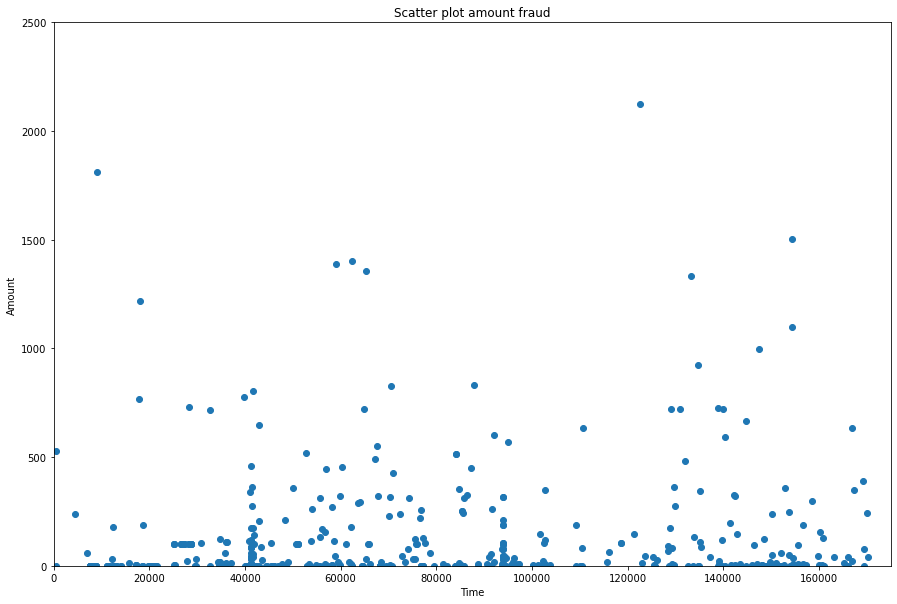

In [5]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15, 10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0, 175000])
plt.ylim([0, 2500])
plt.show()

In [6]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0]
print('There are only '+ str(nb_big_fraud) + ' frauds where the amount was bigger than 1000 over '+ str(df_fraud.shape[0])+ ' frauds')

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds


In [7]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])

print('There are only '+ str(number_fraud)+ ' frauds in the original dataset, even though there are '
     + str(number_no_fraud) + ' no frauds in the dataset.')

There are only 492 frauds in the original dataset, even though there are 284315 no frauds in the dataset.


Data Imbalance 확인

In [8]:
print("The accuracy of the classifier then would be : "+ str((284315-492)/284315)+ " which is the number of good classification over the number of tuple to classify")

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tuple to classify


In [9]:
df_corr = df.corr()

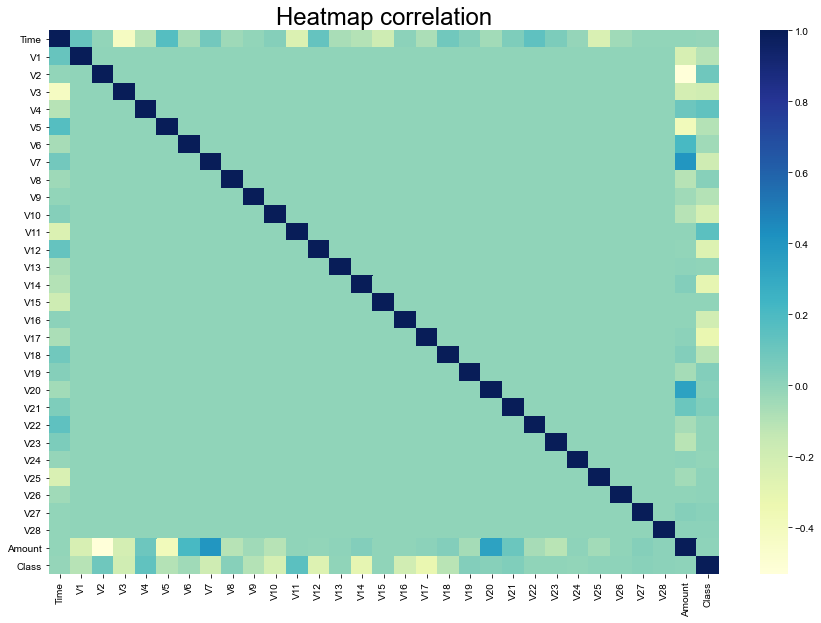

In [10]:
plt.figure(figsize=(15,10))
seaborn.heatmap(df_corr, cmap='YlGnBu')
seaborn.set(font_scale=2, style='white')

plt.title('Heatmap correlation')
plt.show()

데이터의 feature 를 통하여, 상관관계가 미약하다는 것을 확인하였고, 이 많은 feature 들은 PCA 를 통하여 차원 축소가 시행되었다는 짐작을 할 수 있다.

In [11]:
rank = df_corr['Class']

df_rank = pd.DataFrame(rank)
df_rank = np.abs(df_rank).sort_values(by='Class', ascending=False)
df_rank.dropna(inplace=True)

In [12]:
df_rank

Class
Class   1.000000
V17     0.326481
V14     0.302544
V12     0.260593
V10     0.216883
V16     0.196539
V3      0.192961
V7      0.187257
V11     0.154876
V4      0.133447
V18     0.111485
V1      0.101347
V9      0.097733
V5      0.094974
V2      0.091289
V6      0.043643
V21     0.040413
V19     0.034783
V20     0.020090
V8      0.019875
V27     0.017580
Time    0.012323
V28     0.009536
V24     0.007221
Amount  0.005632
V13     0.004570
V26     0.004455
V15     0.004223
V25     0.003308
V23     0.002685
V22     0.000805

In [13]:
df_train_all = df[0:150000]
df_train_1 = df_train_all[df_train_all['Class']==1]
df_train_0 = df_train_all[df_train_all['Class']==0]

print('In this dataset, we have ' + str(len(df_train_1)) + " frauds so we need to take a similar number of non-fraoud")

In this dataset, we have 293 frauds so we need to take a similar number of non-fraoud


In [14]:
df_sample = df_train_0.sample(300)
df_train = df_train_1.append(df_sample)
df_train = df_train.sample(frac=1)

In [15]:
X_train = df_train.drop(['Time', 'Class'], axis=1)
y_train = df_train['Class']
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

print(X_train.shape, y_train.shape)
print('--------------------------')
print(X_train)
print(y_train)

(593, 29) (593,)
--------------------------
[[ 1.10326418e+00 -1.52138925e-01 -3.43749533e-01 ... -7.06731430e-02
   1.55622320e-02  1.24000000e+02]
 [ 1.15937315e+00  2.84479470e+00 -4.05067951e+00 ...  9.97894426e-03
   1.60769150e-01  1.00000000e+00]
 [-1.76096803e+00  3.16129806e-01  2.53107227e+00 ... -2.39447268e-01
  -3.74249112e-01  1.68030000e+02]
 ...
 [-2.14693858e+00  1.29872897e+00  2.93280728e+00 ... -5.23241120e-01
  -9.52989889e-01  2.54400000e+01]
 [-4.71052878e+00  8.63621439e+00 -1.54962220e+01 ...  1.60595762e+00
   7.21643615e-01  1.00000000e+00]
 [-3.24018659e+00  2.97812179e+00 -4.16231394e+00 ...  4.21299802e-01
   3.14587612e-03  1.72320000e+02]]
[0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1
 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1
 0 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1

In [16]:
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'], axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

In [17]:
X_train_rank = df_train[df_rank.index[1:11]]
X_train_rank

V17        V14        V12        V10        V16         V3  \
93328   -0.365639  -0.012558   0.526035  -0.196034  -0.111678  -0.343750   
40525    6.443510  -7.208312  -2.425933  -2.042168   2.375296  -4.050680   
30972    0.455235  -1.098984   0.644865  -1.095936  -0.661644   2.531072   
16415   -4.835558  -4.852867  -3.826705  -3.465689  -2.617361  -1.459495   
102916   1.184497   0.065491   0.614774   0.740977  -1.218134  -1.586761   
...           ...        ...        ...        ...        ...        ...   
6427    -4.830324  -6.210258  -7.148243  -4.624985  -3.599540  -5.329976   
96789   -5.301273  -6.160457  -3.581375  -2.856117  -2.543105  -1.822448   
116281  -0.636943  -2.550936  -0.855160   5.026082  -2.569609   2.932807   
9509   -13.799148 -17.475921 -16.558197 -11.712187 -10.222203 -15.496222   
43773   -9.855927  -6.073989  -6.533107  -4.758304  -7.718042  -4.162314   

               V7        V11         V4       V18  
93328    0.446205  -1.144487   0.572710 -0.447405  
40525    1.744086   1.844093   4.777701  2.591846  
30972    0.318715  -1.417623   0.711357 -0.807608  
16415   -2.814263   2.351619   1.921863 -1.921752  
102916   1.121374   1.604528  -0.193311 -0.531872  
...           ...        ...        ...       ...  
6427    -3.968593   5.588724   4.007683 -0.649090  
96789   -1.722523   1.618262   0.605761 -2.192713  
116281   1.316622   0.770478  -0.574379  0.855002  
9509   -10.788373  11.152491  10.313349 -5.008585  
43773   -4.744730   3.471098   3.869124 -5.193908  

[593 rows x 10 columns]

In [18]:
X_test_all_rank = df_test_all[df_rank.index[1:11]]
X_test_all_rank = np.asarray(X_test_all_rank)
y_test_all = np.asarray(y_test_all)

In [19]:
class_names = np.array(['0','1'])

In [20]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [21]:
classifier = svm.SVC(kernel='linear')

In [22]:
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [23]:
prediction_SVM_all = classifier.predict(X_test_all)

In [24]:
cm = confusion_matrix(y_test_all, prediction_SVM_all)
print(cm)
print(cm.shape[0], cm.shape[1])

[[123624  10984]
 [    15    184]]
2 2


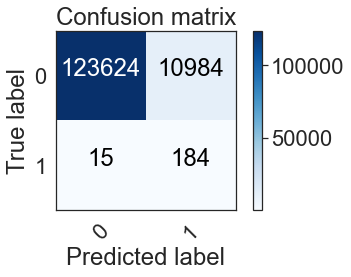

In [25]:
plot_confusion_matrix(cm, class_names)

In [26]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 184 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9246231155778895
the accuracy is : 0.9184092814171371


차원을 29 개의 feature 에서 10 개로 축소

In [27]:
classifier.fit(X_train_rank, y_train)
prediction_SVM = classifier.predict(X_test_all_rank)

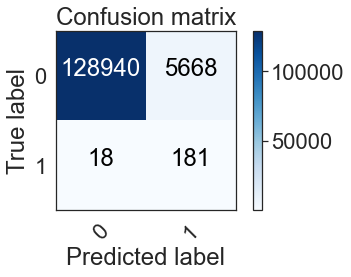

In [28]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm, class_names)

In [29]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 181 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9095477386934674
the accuracy is : 0.9578211813926577


In [30]:
classifier_b = svm.SVC(kernel='linear',class_weight={0:0.60, 1:0.40})
classifier_b.fit(X_train, y_train)
prediction_SVM_b_all = classifier_b.predict(X_test_all)

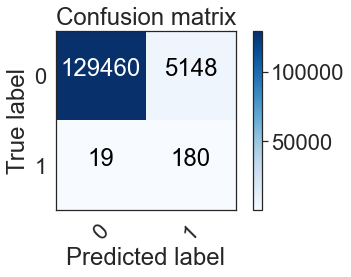

In [31]:
cm = confusion_matrix(y_test_all, prediction_SVM_b_all)
plot_confusion_matrix(cm, class_names)

In [32]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 180 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.9045226130653267
the accuracy is : 0.9616711298374714


In [33]:
classifier_b.fit(X_train_rank, y_train)
prediction_SVM = classifier_b.predict(X_test_all_rank)

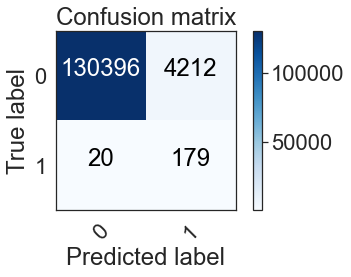

In [34]:
cm = confusion_matrix(y_test_all, prediction_SVM)
plot_confusion_matrix(cm, class_names)

In [35]:
print('We have detected ' + str(cm[1][1]) + ' frauds / ' + str(cm[1][1]+cm[1][0]) + ' total frauds.')
print('\nSo, the probability to detect a fraud is ' + str(cm[1][1]/(cm[1][1]+cm[1][0])))
print("the accuracy is : "+str((cm[0][0]+cm[1][1]) / (sum(cm[0]) + sum(cm[1]))))

We have detected 179 frauds / 199 total frauds.

So, the probability to detect a fraud is 0.8994974874371859
the accuracy is : 0.9686069714480702
